<a href="https://colab.research.google.com/github/mahdid-lilia/SIC_Samsung-Innovation-Campus-AI-Course/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as shc
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize


In [3]:
data=pd.read_csv('/content/sample_data/CC GENERAL.csv')

PREPROCESSING

In [4]:
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

replacing missing values

In [7]:
data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median())
data['CREDIT_LIMIT']=data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean())


In [8]:
data.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data=data.drop("CUST_ID", axis = 1)

In [10]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


LET S DO SOME VISIULISATION

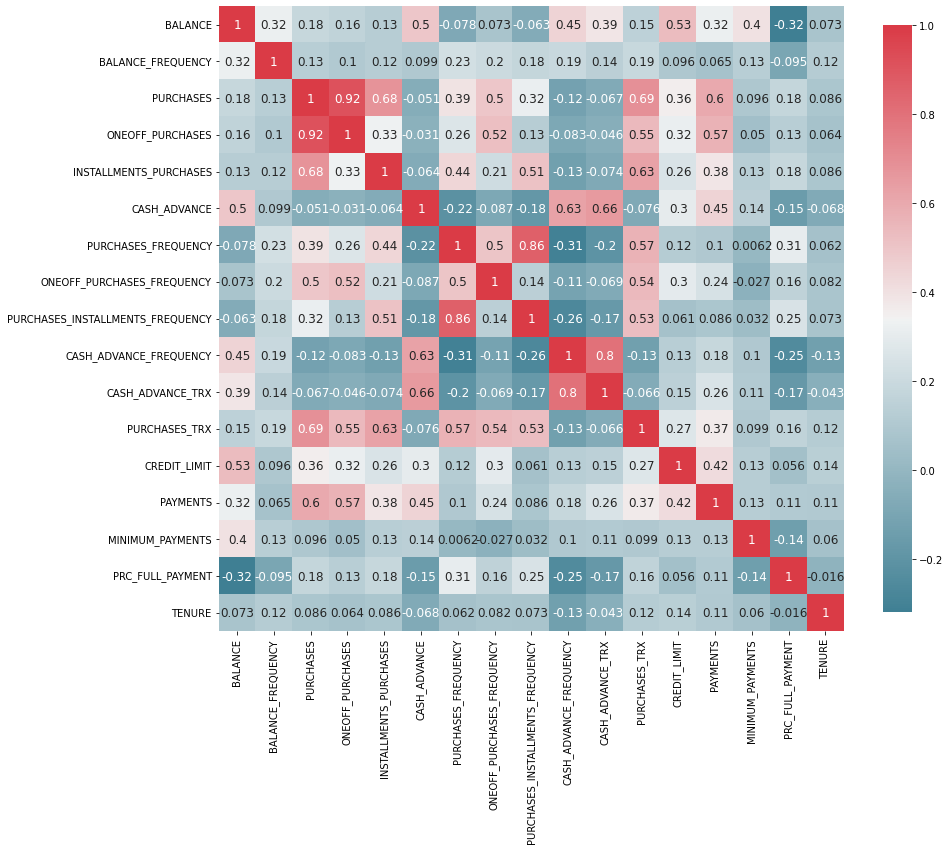

In [11]:
def plot_correlation_map( data):
    corr = data.corr()
    s , ax = plt.subplots( figsize =( 14 , 12 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap( corr, cmap = cmap,square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(data)

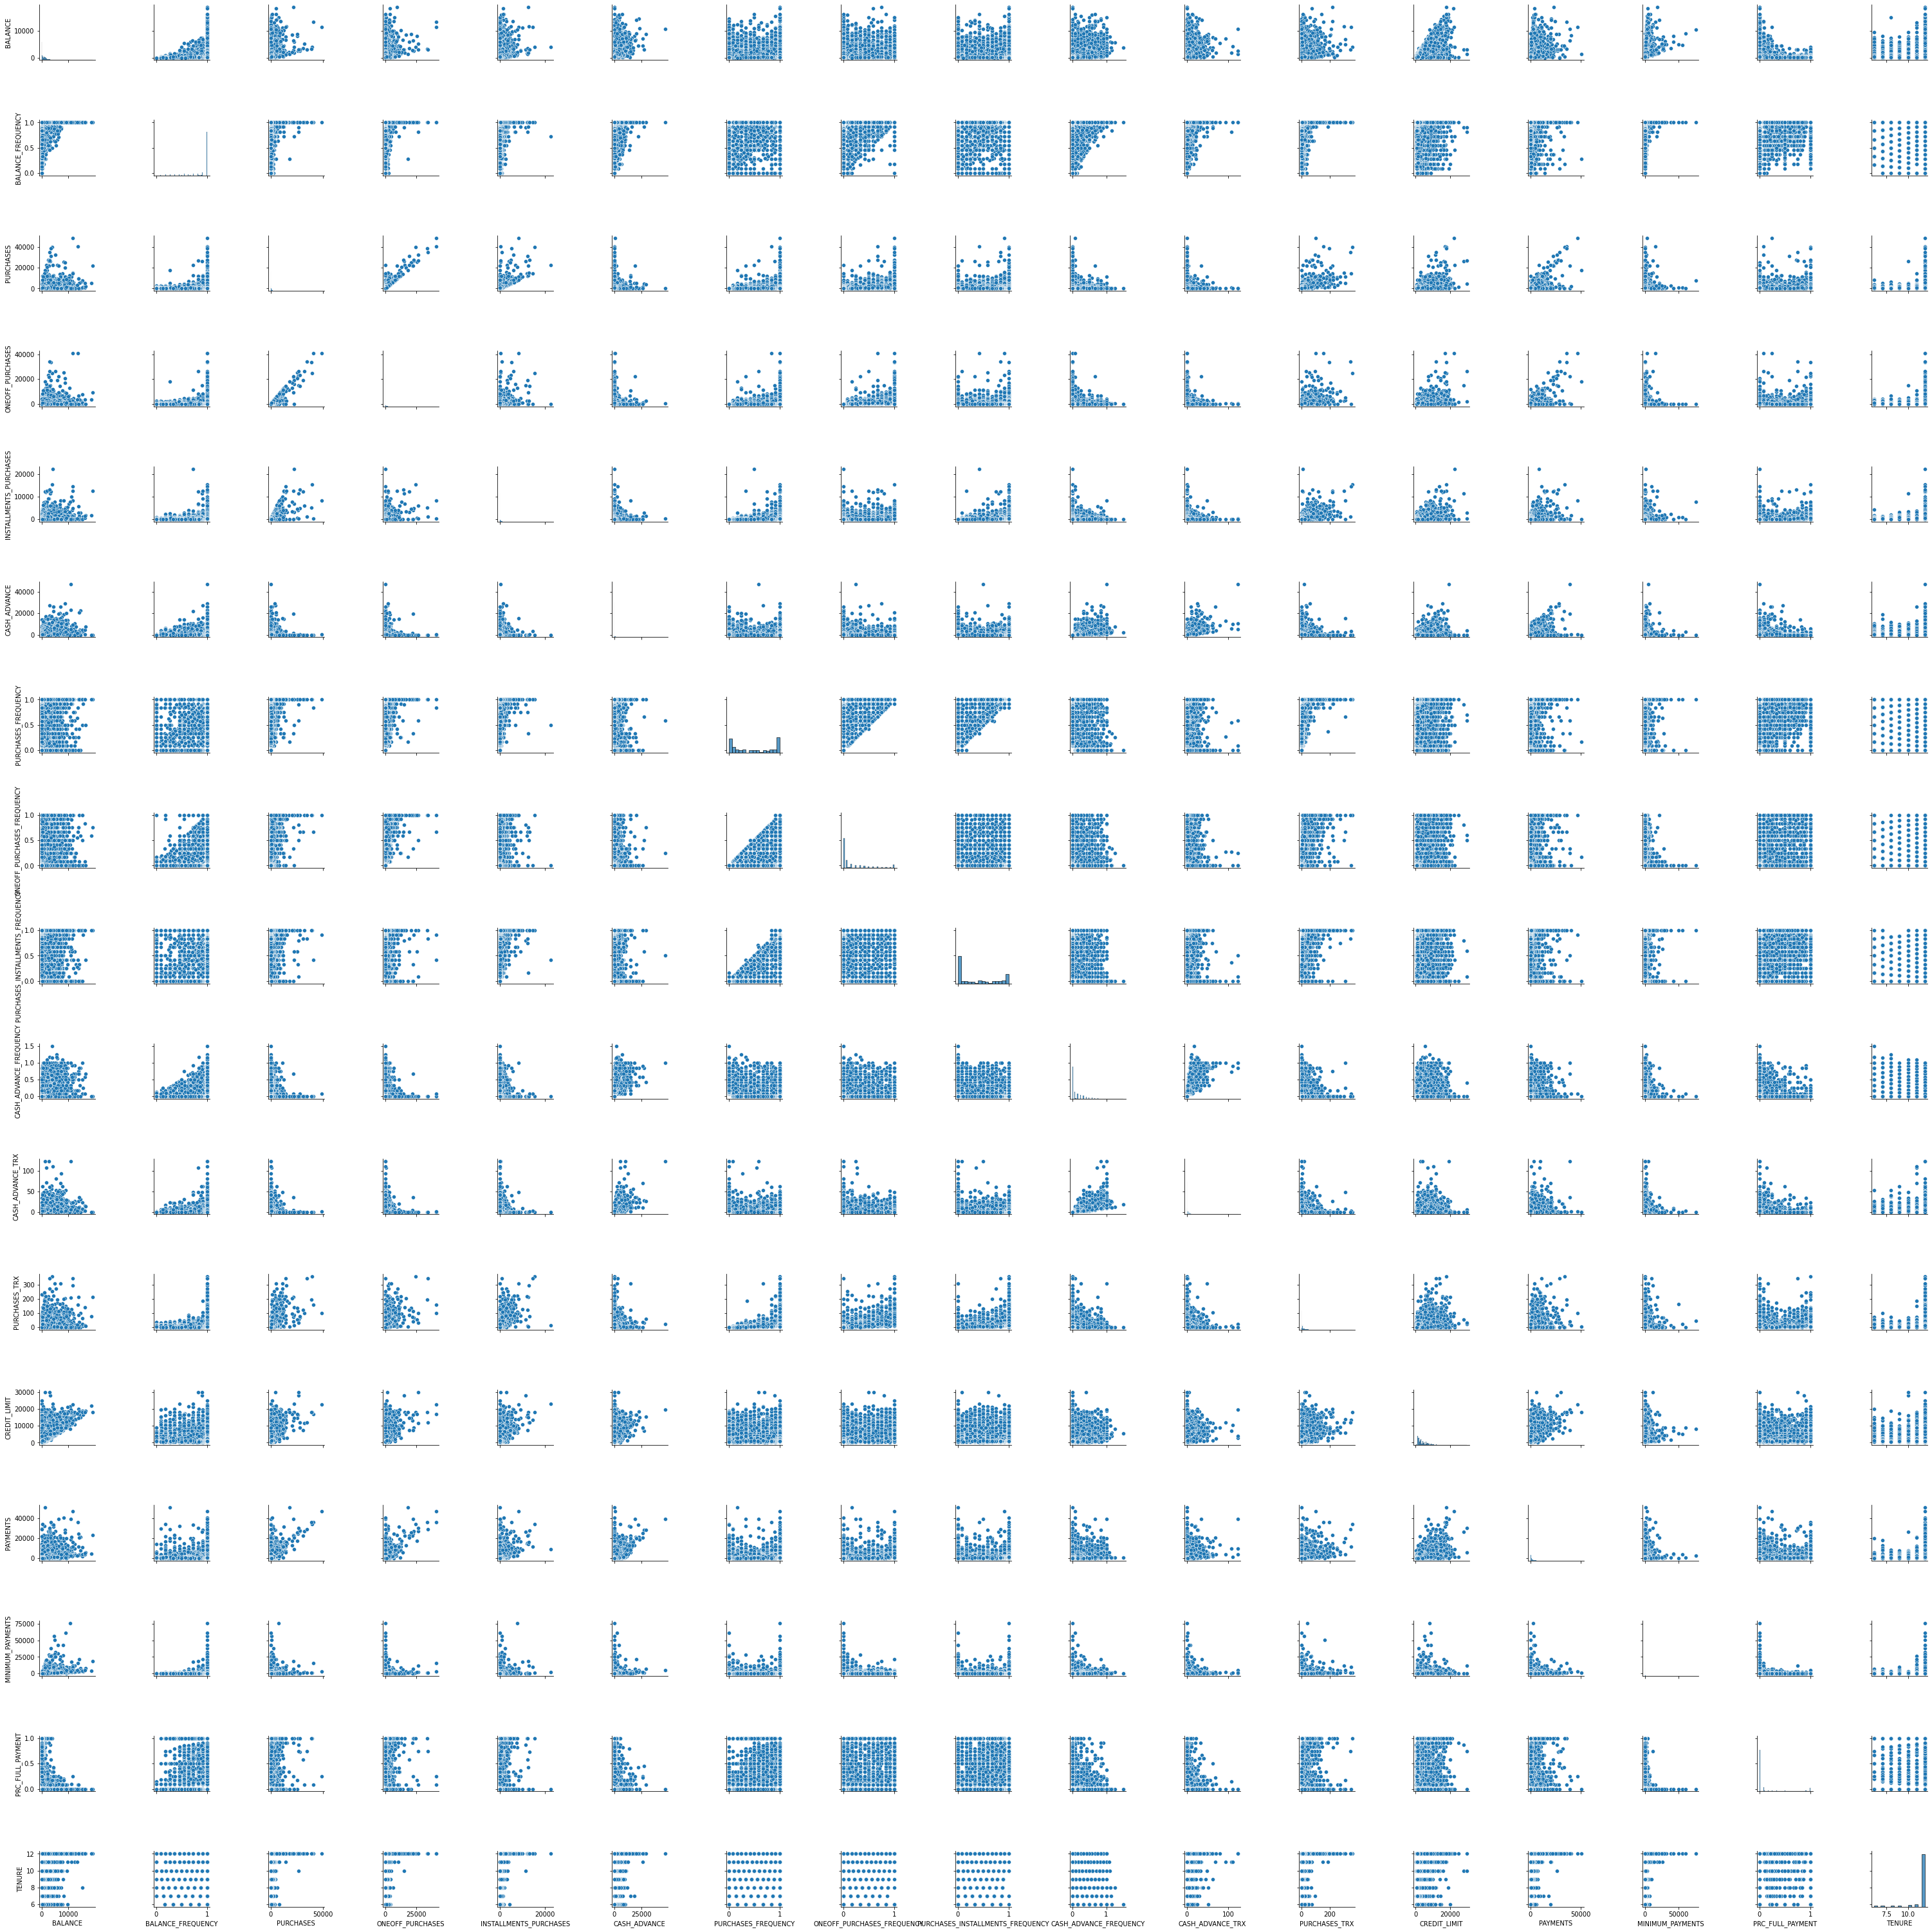

In [12]:
sns.pairplot(data)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

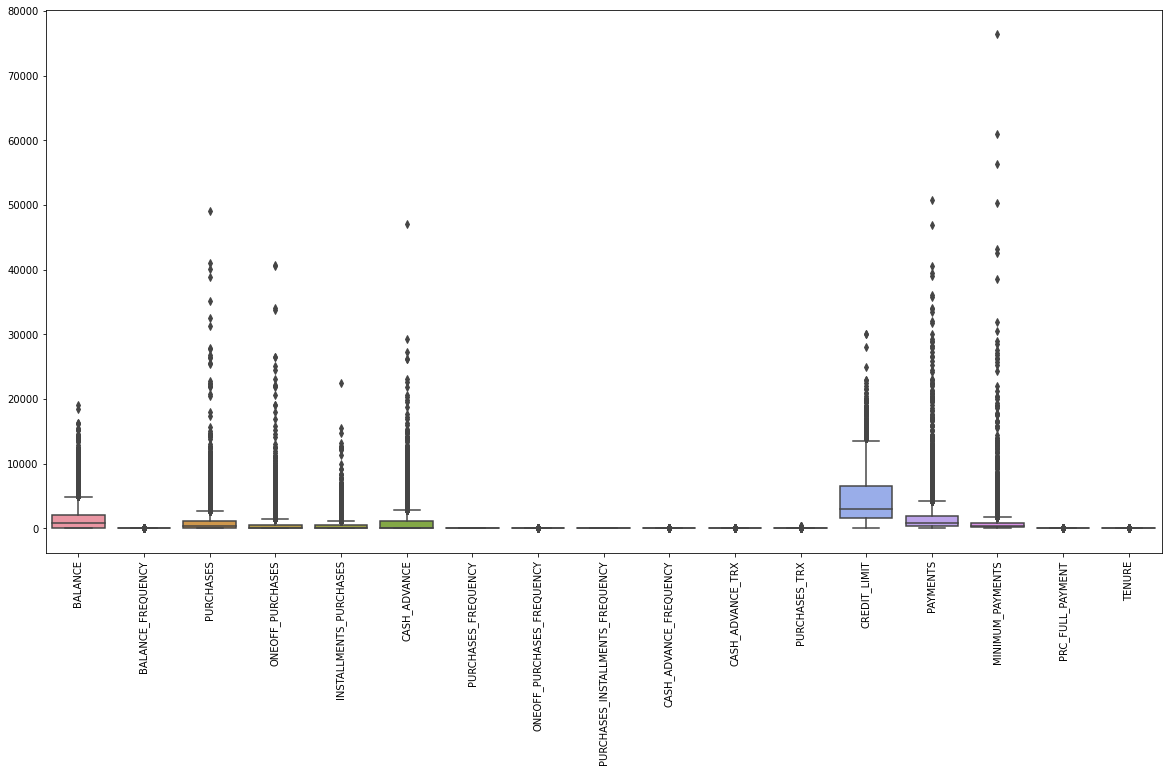

In [13]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)

we notice that our data is full of outliers , we should handl it 

we delet outliers

In [14]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

data = data[(z < 3).all(axis=1)]

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.731989           0.249434   0.424900          0.356934   
1     0.786961           0.134325   0.469552          0.356934   
2     0.447135           0.518084   0.107668          0.108889   
3     0.049099           1.016953   0.232058          0.546189   
4     0.358775           0.518084   0.462063          0.347294   
...        ...                ...        ...               ...   
8945  0.737950           0.518084   0.333293          0.356934   
8946  0.742423           0.518084   0.329136          0.356934   
8947  0.740398           0.185477   0.401965          0.356934   
8948  0.745174           0.185477   0.469552          0.356934   
8949  0.572575           0.889033   0.042146          0.301732   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.349079      0.466786             0.806490   
1                   0.454576      2.605605             1.221758   
2     

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

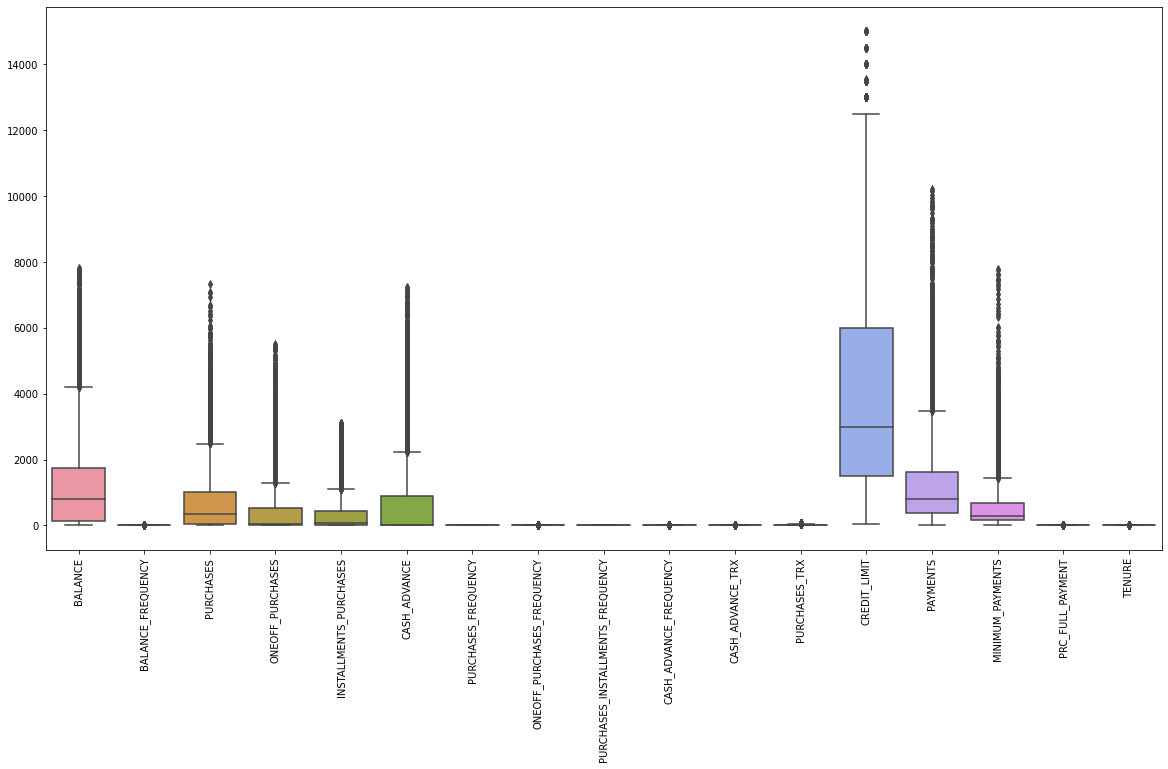

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data)
plt.xticks(rotation=90)

In [16]:
scaler=StandardScaler()
scaler.fit(data)

StandardScaler()

In [17]:
scaled_data=scaler.transform(data)


In [19]:
scaled_data

array([[-0.80965236, -0.33491067, -0.64144794, ..., -0.56418479,
        -0.53152321,  0.31218731],
       [ 1.27327162,  0.09112689, -0.73448727, ...,  0.63748261,
         0.2326373 ,  0.31218731],
       [ 0.80727139,  0.51716446,  0.01955068, ...,  0.06416447,
        -0.53152321,  0.31218731],
       ...,
       [-0.26386232, -0.65444001, -0.73448727, ..., -0.30850755,
        -0.53152321, -4.6976356 ],
       [-0.74584887,  0.51716446, -0.30439979, ..., -0.5833401 ,
        -0.53152321, -4.6976356 ],
       [-0.61848108, -0.65444001, -0.65529656, ..., -0.47973622,
        -0.53152321, -4.6976356 ]])

PCA APPLICATION

In [20]:
from sklearn.decomposition import PCA


since we dont know the right number of PC we try it first for n_component=17

In [21]:
pca = PCA(n_components=17)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [22]:
pca = PCA(n_components=17)
pca.fit(scaled_data)

PCA(n_components=17)

In [23]:
pca_data.shape

(7434, 17)

LET'S DRAW A GRAPH


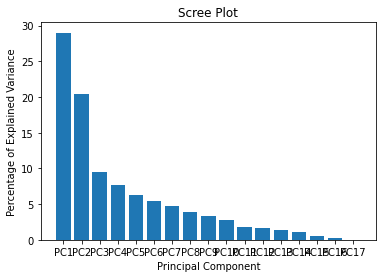

In [24]:
per_var=np.round(pca.explained_variance_ratio_*100,decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

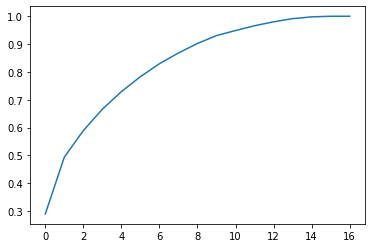

In [25]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

a partir de combien de composantes on peut atteindre 85% de varinace ?

In [26]:
meilleur_dims = np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.85)
meilleur_dims

7

In [27]:
pca = PCA(n_components=7)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

Let's look for an optimal K


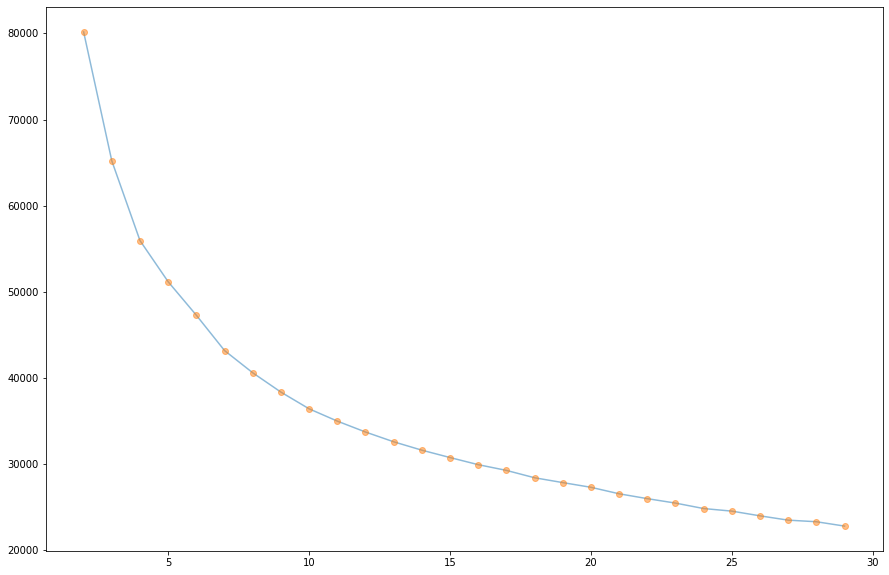

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
plt.figure(figsize=(15,10))
distances=[]
for i in range(2,30):
    kmeans= KMeans(n_clusters=i, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
    kmeans.fit(pca_data)
    distances.append(kmeans.inertia_)
    label= kmeans.labels_
plt.plot(np.arange(2,30,1), distances, alpha=0.5)
plt.plot(np.arange(2,30,1), distances,'o' ,alpha=0.5)
plt.show()


we see that the optimal k=3[texte du lien](https://)

we try another method to find an optimal k called silhouette_score

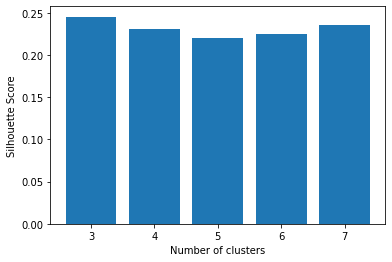

In [29]:
silhouette_scores = [] 
for n_cluster in range(3, 8):
    silhouette_scores.append(   
        silhouette_score(pca_data, KMeans(n_clusters = n_cluster).fit_predict(pca_data))) 
    
k = [3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

we use k means for k=3

In [30]:
kmeans= KMeans(n_clusters=3, n_init=10, init= 'k-means++', algorithm='full', max_iter=300)
kmeans.fit(pca_data)
labels= kmeans.labels_

We use PCA again so that we can reduce the data to 2 components, in order to visualize our clusters better

In [31]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_data=pca.transform(scaled_data)

In [32]:
pca_df = pd.DataFrame(data=pca_data, columns=['pca1','pca2'])
pca_df['labels']= labels
pca_df.head()

,pca1,pca2,labels
0,-1.330768,-2.040078,0
1,-2.776060,3.320095,1
2,1.238120,0.543206,2
3,-0.574576,-0.219446,0
4,-1.452052,-1.461354,0


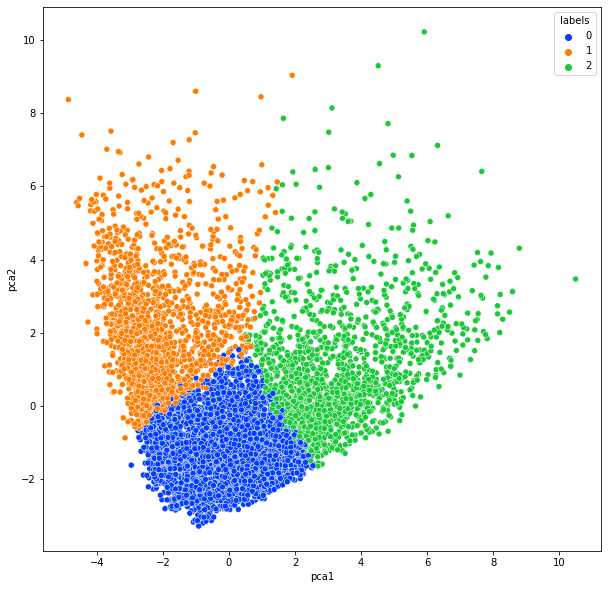

In [33]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x='pca1', y='pca2', hue='labels', data=pca_df, palette='bright')

we visualise our data depending on our features


In [36]:
clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,1.0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,2.0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,312.343947,0.000000,12.0,0.0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0


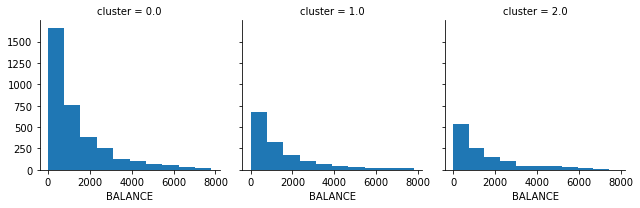

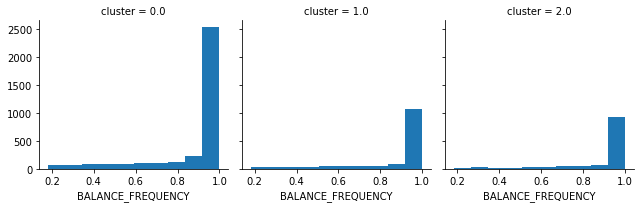

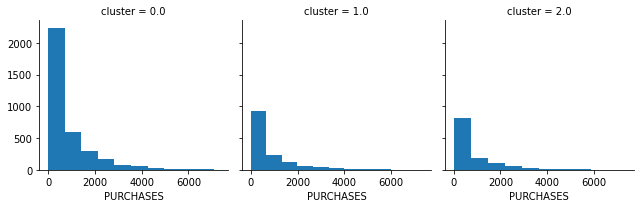

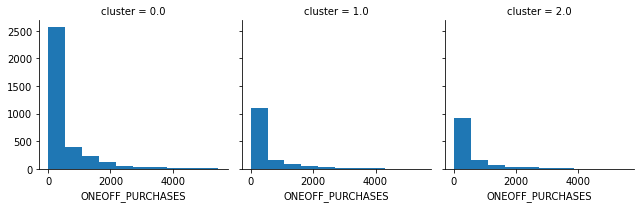

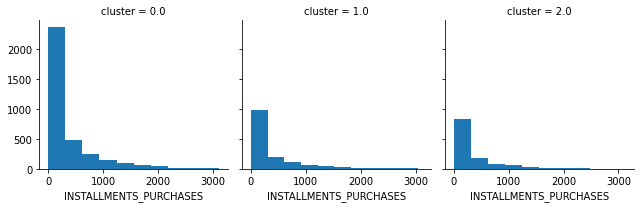

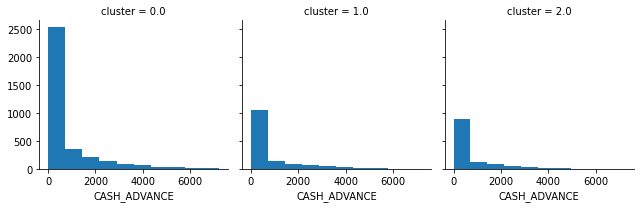

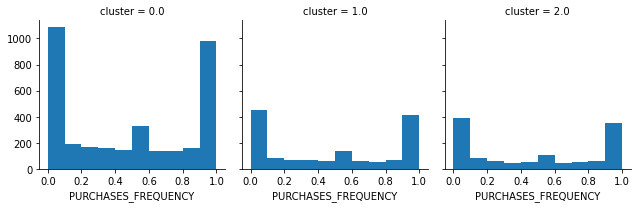

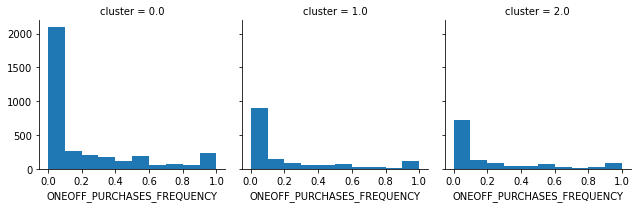

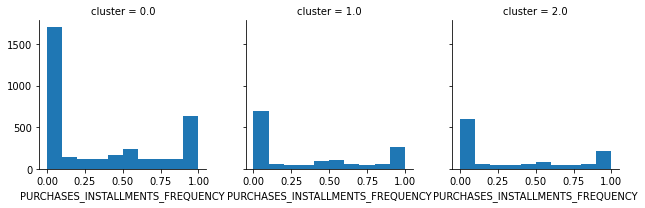

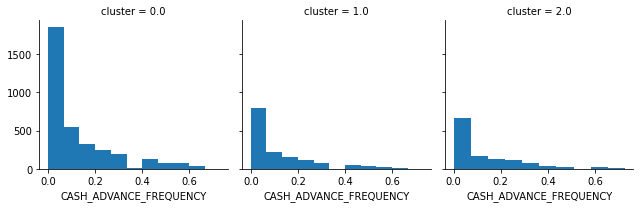

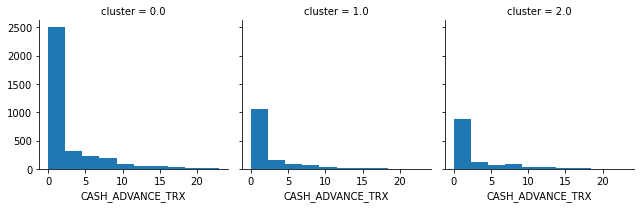

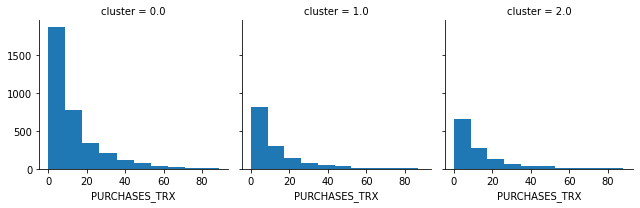

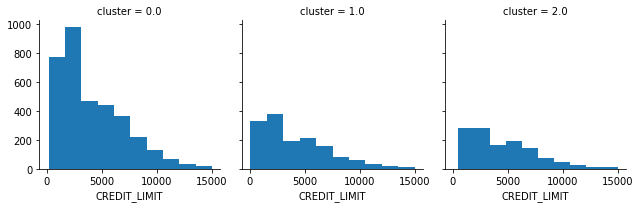

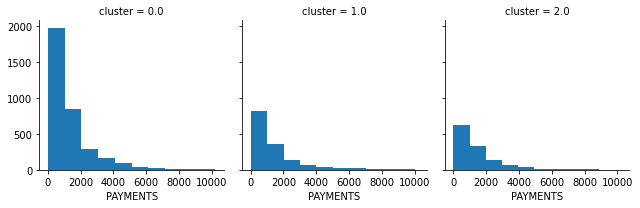

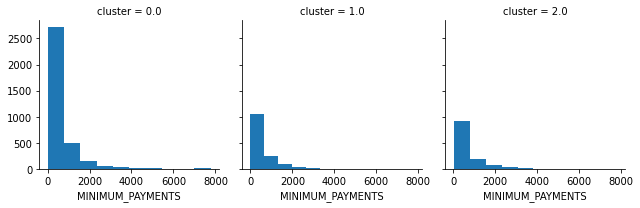

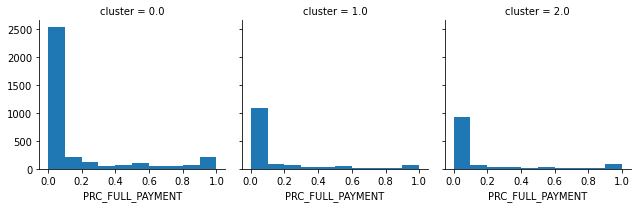

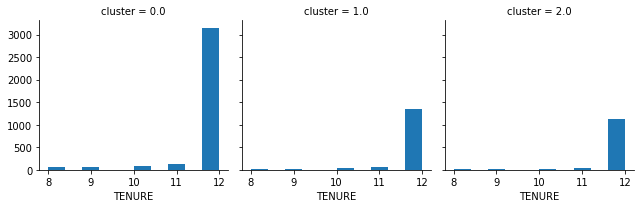

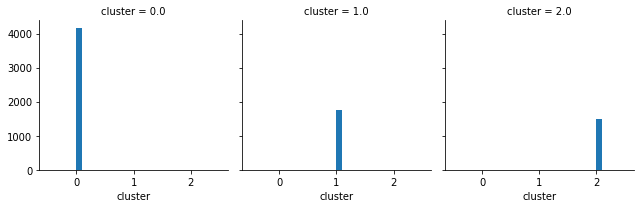

In [37]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

Cluster analysis

Cluster 0 : Customers with more usage of credit card and makes more frequent purchases of product.
Cluster 1 : Customers with least usage of credit card.
Cluster 2 : Customers with moderate usage of credit card.

hierchical clustering


In [38]:
X =pca_data
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')  
Y = model.fit_predict(X)

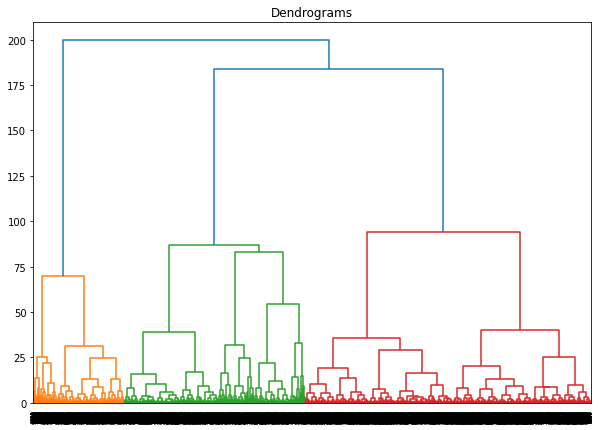

In [39]:
# the dendrogram :
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))